<a href="https://colab.research.google.com/github/Hemasri20/programming-java/blob/master/Chi225.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Importing Libraries***

In [2]:
import numpy as np
import sys
np.set_printoptions(threshold=10)
import matplotlib.pyplot as plt
import pandas as pd 
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***Load the dataset***

In [30]:
#dataset=pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer_Project-main/Ovarian_Cancer_Project-main/ovariantotal.csv')
df=pd.read_csv('/content/drive/MyDrive/Ovarian_Cancer_Project-main/Ovarian_Cancer_Project-main/ovariantotal.csv')
df.head()

,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,...,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,TYPE
0,3.58,19.36,47,45.4,56,11,24,0.01,0.30,5.35,...,0.09,13.4,1.46,74,2.64,13.7,5.5,73.9,396.4,0
1,34.24,23.98,61,39.9,95,9,13,0.02,0.30,3.21,...,0.30,11.2,1.09,304,4.89,12.7,6.8,72.0,119.2,0
2,1.50,18.40,39,45.4,77,9,18,0.03,0.60,3.80,...,0.13,15.2,0.97,112,4.62,12.0,14.8,77.9,209.2,0
3,2.75,16.60,45,39.2,26,16,17,0.05,0.74,5.27,...,0.25,17.4,1.25,339,4.01,14.6,10.9,66.1,215.6,0
4,2.36,19.97,45,35.0,47,21,27,0.01,0.10,4.89,...,0.28,11.9,0.94,272,4.40,13.4,5.3,66.5,206.0,0


In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['TYPE'], axis=1),
    df['TYPE'],
    test_size=0.2,
    random_state=1)

In [32]:
X_train.head() 
X_train.shape

(279, 49)

In [33]:
X_test.head()
X_test.shape

(70, 49)

In [ ]:
y_train.head()  
y_train.shape

(279,)

In [ ]:
y_test.shape


(70,)

In [34]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(49,49))
corr = pd.DataFrame(df).corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,1.000000,-0.075975,0.213769,-0.206773,-0.064842,0.108320,0.117043,0.222841,0.015173,-0.071301,0.211393,-0.022086,0.063697,0.292641,-0.014703,-0.088378,-0.053768,0.115254,0.063150,0.012694,0.111589,0.121900,-0.056077,-0.020513,-0.114477,0.090443,0.136456,0.095678,-0.117175,-0.292756,0.239100,-0.026333,0.188415,0.146195,-0.110847,-0.107606,-0.059222,-0.033759,-0.153567,-0.104793,0.292443,0.066845,-0.048723,-0.112442,0.036476,0.162016,0.037539,0.023106,-0.262733
1,-0.075975,1.000000,0.156380,0.275690,0.058243,-0.310208,0.077219,0.156541,-0.030980,0.116967,-0.013397,-0.126846,-0.000723,0.097514,-0.365460,0.096923,0.088737,0.102744,0.300924,-0.204950,-0.094598,-0.031560,-0.124270,0.047279,-0.165762,-0.313407,-0.219678,-0.156454,-0.019493,-0.001255,-0.015625,0.188902,0.035941,0.072942,0.304059,0.131407,0.157256,0.134495,0.120203,-0.121867,-0.164123,-0.044910,-0.127610,0.016661,0.077612,0.116183,0.119794,0.124997,-0.045755
2,0.213769,0.156380,1.000000,-0.092805,0.303717,-0.039829,-0.048901,-0.119190,-0.189646,0.157163,-0.124803,0.099631,-0.000420,0.025390,-0.016989,0.139412,-0.023216,0.123741,0.030749,-0.047207,0.022154,-0.005740,-0.166078,0.203488,-0.053868,-0.155164,-0.040797,-0.127695,-0.064321,-0.143445,0.108557,0.132421,-0.237254,-0.138888,-0.152941,0.291154,-0.061124,0.036875,0.151033,-0.105895,0.210961,-0.038242,0.240940,-0.127309,-0.008630,0.108109,0.260896,-0.105820,0.091062
3,-0.206773,0.275690,-0.092805,1.000000,-0.052080,0.080007,-0.125103,0.079370,-0.188296,0.015376,-0.244826,0.136862,-0.123333,0.028588,0.114238,-0.023630,0.080973,0.016953,-0.046054,0.151837,0.026703,-0.001000,-0.116446,0.204831,0.130163,-0.123332,-0.312097,-0.098327,-0.049652,-0.159945,-0.187964,0.101462,0.181820,-0.265069,-0.165342,0.061065,-0.023053,-0.086369,0.079228,-0.038427,0.054780,-0.299747,0.043239,-0.249068,-0.157858,0.097988,-0.052828,0.057817,-0.062840
4,-0.064842,0.058243,0.303717,-0.052080,1.000000,0.298441,-0.100231,-0.034928,-0.017662,-0.023436,-0.292984,-0.073397,-0.257827,-0.158244,0.116888,-0.048591,0.039039,-0.055932,0.136774,-0.220574,-0.128078,-0.309576,-0.218706,0.118437,0.096878,-0.101709,-0.028014,-0.298704,-0.079563,0.004830,0.050207,0.008361,-0.133776,-0.074914,-0.159287,0.281919,-0.252714,-0.124075,0.248337,0.154048,0.050095,-0.085200,0.137697,-0.042419,-0.106305,-0.031994,0.136439,-0.319932,0.136294
5,0.108320,-0.310208,-0.039829,0.080007,0.298441,1.000000,0.119716,0.296606,-0.047927,0.035237,0.068084,0.068699,-0.064998,-0.148872,0.297338,-0.041723,0.052530,-0.134038,-0.035010,0.143331,-0.103150,-0.070947,0.081847,0.080640,0.176912,0.017896,0.029004,0.076432,0.057656,-0.173611,0.097992,0.021007,0.133995,0.043393,-0.305581,0.023688,-0.044282,-0.135667,0.109027,-0.048674,0.248421,-0.292901,0.217877,-0.275165,-0.011954,0.061963,0.124481,-0.083202,-0.008362
6,0.117043,0.077219,-0.048901,-0.125103,-0.100231,0.119716,1.000000,0.087762,-0.089406,-0.001959,0.018515,-0.063065,0.074794,0.185661,-0.069455,-0.197036,0.063310,0.080489,0.162042,-0.057531,-0.034446,0.013103,0.050068,-0.300493,-0.295127,0.281420,0.167403,0.108598,-0.061843,-0.123758,0.295996,0.244742,-0.007904,0.104712,0.058086,-0.017109,-0.248545,0.258056,-0.094522,-0.039518,-0.038861,0.096114,0.005112,0.049511,0.254020,0.088695,0.124783,0.124689,0.210642
7,0.222841,0.156541,-0.119190,0.079370,-0.034928,0.296606,0.087762,1.000000,0.150376,0.078032,-0.037825,0.101280,-0.081926,-0.098330,-0.003680,-0.180411,-0.170987,-0.126016,0.152936,0.243083,0.025761,-0.110084,0.094328,0.016335,0.113215,0.093648,0.026120,-0.139029,0.148127,-0.215140,-0.103688,0.059790,0.049550,0.028059,-0.029156,-0.000956,0.158077,0.161293,-0.104624,-0.118962,-0.071121,0.101728,0.031960,-0.057365,0.063425,0.330933,-0.044257,0.046515,-0.247492
8,0.015173,-0.030980,-0.189646,-0.188296,-0.017662,-0.047927,-0.089406,0.150376,1.000000,0.192016,0.018059,-0.159106,-0.095211,

In [35]:
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)
f_p_values

(array([2.42087455e+03, 1.96031916e-02, 3.94034959e+02, ...,
        1.03663661e+01, 7.43121754e+00, 1.26113557e-01]),
 array([0.00000000e+00, 8.88650985e-01, 1.09514897e-87, ...,
        1.28331902e-03, 6.41019562e-03, 7.22496169e-01]))

In [36]:
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns
p_values

AFP           0.000000e+00
AG            8.886510e-01
Age           1.095149e-87
ALB           3.788457e-07
ALP           4.424097e-52
ALT           1.072252e-01
AST           5.624739e-12
BASO#         9.258064e-01
BASO%         3.525297e-01
BUN           8.970128e-01
Ca            4.151504e-01
CA125         0.000000e+00
CA19-9        0.000000e+00
CA72-4        6.545444e-53
CEA           1.817087e-66
CL            8.916776e-01
CO2CP         3.907998e-01
CREA          2.564460e-02
DBIL          1.718903e-01
EO#           7.638320e-01
EO%           6.811723e-02
GGT           5.621515e-09
GLO           1.672737e-02
GLU.          1.429224e-01
HCT           8.763117e-01
HE4           0.000000e+00
HGB           1.150160e-06
IBIL          2.817738e-03
K             9.455105e-01
LYM#          4.700270e-02
LYM%          1.064301e-28
MCH           2.959388e-01
MCV           9.859779e-01
Menopause     1.922070e-10
Mg            9.808170e-01
MONO#         3.140730e-01
MONO%         1.228541e-01
M

In [37]:
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(chi2, k=25)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['AFP', 'Age', 'ALB', 'ALP', 'ALT', 'AST', 'CA125', 'CA19-9', 'CA72-4',
       'CEA', 'CREA', 'EO%', 'GGT', 'GLO', 'HE4', 'HGB', 'IBIL', 'LYM#',
       'LYM%', 'Menopause', 'NEU', 'PDW', 'PLT', 'TBIL', 'TP'],
      dtype='object')

In [38]:
X_train=X_train[['AFP', 'Age', 'ALB', 'ALP', 'ALT', 'AST', 'CA125', 'CA19-9', 'CA72-4',
       'CEA', 'CREA', 'EO%', 'GGT', 'GLO', 'HE4', 'HGB', 'IBIL', 'LYM#',
       'LYM%', 'Menopause', 'NEU', 'PDW', 'PLT', 'TBIL', 'TP']]

In [39]:
X_test=X_test[['AFP', 'Age', 'ALB', 'ALP', 'ALT', 'AST', 'CA125', 'CA19-9', 'CA72-4',
       'CEA', 'CREA', 'EO%', 'GGT', 'GLO', 'HE4', 'HGB', 'IBIL', 'LYM#',
       'LYM%', 'Menopause', 'NEU', 'PDW', 'PLT', 'TBIL', 'TP']]

In [40]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = pd.DataFrame(X_train).corr()
corr.style.background_gradient(cmap='coolwarm')

,AFP,Age,ALB,ALP,ALT,AST,CA125,CA19-9,CA72-4,CEA,CREA,EO%,GGT,GLO,HE4,HGB,IBIL,LYM#,LYM%,Menopause,NEU,PDW,PLT,TBIL,TP
AFP,1.000000,-0.044383,-0.144226,-0.008882,-0.011766,0.159237,0.065836,-0.014686,-0.010327,0.013060,-0.050502,-0.086151,-0.013011,-0.005718,0.008041,-0.000932,0.015568,-0.110949,-0.147403,-0.071495,0.174113,-0.000886,0.106159,0.039957,-0.106747
Age,-0.044383,1.000000,-0.275818,0.346890,0.047571,0.303630,0.337606,0.103946,0.100163,0.006057,0.123029,-0.030158,0.150279,0.084338,0.347785,-0.077174,0.014652,-0.220893,-0.277473,0.801124,0.334217,-0.071357,0.149155,-0.005145,-0.151096
ALB,-0.144226,-0.275818,1.000000,-0.042766,0.041171,-0.001885,-0.253411,-0.099264,-0.134155,-0.116937,0.131483,0.108213,-0.092902,-0.052599,-0.408089,0.386761,0.349961,0.228283,0.368399,-0.179361,-0.324088,-0.062872,-0.372187,0.319238,0.771055
ALP,-0.008882,0.346890,-0.042766,1.000000,0.085336,0.175285,0.154864,0.114564,0.117136,0.334997,-0.026671,-0.010947,0.261610,0.277442,0.159213,0.073086,0.077674,-0.086345,-0.130994,0.363574,0.148732,-0.119789,0.169450,0.077310,0.117443
ALT,-0.011766,0.047571,0.041171,0.085336,1.000000,0.616975,-0.055573,-0.048422,-0.006781,0.054585,-0.112047,0.083050,0.571722,0.106843,0.002798,0.079502,0.096488,0.184777,0.149863,-0.004764,-0.125113,0.207092,-0.041209,0.062670,0.103020
AST,0.159237,0.303630,-0.001885,0.175285,0.616975,1.000000,0.132068,-0.019722,0.018714,0.026450,-0.114233,0.005163,0.274147,0.041672,0.189536,0.035625,0.165224,-0.073615,-0.064197,0.251606,0.129013,-0.159410,0.121436,0.156612,0.039245
CA125,0.065836,0.337606,-0.253411,0.154864,-0.055573,0.132068,1.000000,0.207773,0.444504,0.008947,-0.003276,-0.134497,0.025915,0.090082,0.493524,0.008867,-0.149099,-0.135757,-0.242791,0.347250,0.285135,0.014343,0.302654,-0.140950,-0.143370
CA19-9,-0.014686,0.103946,-0.099264,0.114564,-0.048422,-0.019722,0.207773,1.000000,0.066585,0.303885,-0.125178,-0.044085,0.081344,0.156247,-0.015610,-0.015264,-0.055979,-0.065905,-0.108600,0.079895,0.096459,-0.041010,0.039337,-0.000252,-0.112689
CA72-4,-0.010327,0.100163,-0.134155,0.117136,-0.006781,0.018714,0.444504,0.066585,1.000000,0.136398,0.002022,-0.088506,-0.018532,0.075580,0.274368,-0.020894,-0.010166,-0.117200,-0.154503,0.175399,0.170924,-0.001465,0.150013,-0.015185,-0.046093
CEA,0.013060,0.006057,-0.116937,0.334997,0.054585,0.026450,0.008947,0.303885,0.136398,1.000000,-0.028250,-0.001321,0.073100,0.029078,-0.037192,-0.068858,0.038642,-0.112469,-0.046055,-0.008409,0.029920,-0.005708,-0.019155,0.102091,-0.180554


# ***Feature Scaling***

In [41]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

print(X_train)

[[-0.11385783 -1.20381935  1.08000972 ... -0.06542422 -0.22333608
   0.93395688]
 [-0.11046472  0.70077634 -0.55058326 ...  0.85127312 -1.17265783
  -0.51697453]
 [-0.10839115  1.88293918 -2.27176474 ... -0.07549782 -0.87429956
  -2.15426411]
 ...
 [-0.10980494  0.37239777  0.08353623 ... -0.09564501  0.48187436
   0.98720207]
 [-0.11470611  0.43807349  0.35530173 ... -0.41800012 -0.52169434
   0.21514683]
 [-0.10744862  1.94861489 -0.45999476 ... -1.5764638  -1.09128739
  -0.53028583]]


In [42]:
print(X_test)

[[-0.10499803 -1.00679221  0.10165393 ...  0.17634211  0.86160305
  -0.62346491]
 [-0.10839115 -0.08733222  0.37341943 ...  0.44832923  2.35339437
   0.20183553]
 [-0.07907841 -0.21868365 -0.35128856 ...  0.29722528  1.51256654
  -0.74326658]
 ...
 [-0.10669459  1.29185776  0.13788933 ... -0.07549782  7.94083091
  -0.22412599]
 [-0.10905092  0.56942491 -1.43835055 ...  0.45840283 -0.82005261
  -0.55690842]
 [-0.111313   -0.41571079  0.69953803 ... -0.30719055 -0.1962126
  -0.30399377]]


# ***RANDOM FORESTS***

In [43]:
import pandas as pd 
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score, f1_score, recall_score

%matplotlib inline

In [ ]:
rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

m_best = CV_rfc.best_estimator_

y_t = m_best.predict(X_train)
train_acc = accuracy_score(y_train, y_t)

y_pred = m_best.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

In [45]:
test_acc = accuracy_score(y_test, y_pred) 
print(precision_score(y_test,y_pred)) 
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred)) 


print('Training confusion matrix')
print(confusion_matrix(y_train, y_t))
print('Testing confusion matrix')
print(confusion_matrix(y_test, y_pred)) 
print ("Train accuracy: {0:.4f}".format(train_acc))
print ("Test accuracy: {0:.4f}".format(test_acc))

'''print ("Feature Importance")

importances = m_best.feature_importances_
for i in importances:
    print(i)'''
    
pred_prob3 = m_best.predict_proba(X_test) 
print(classification_report(y_test,y_pred))

0.8974358974358975
0.9210526315789473
0.9090909090909091
Training confusion matrix
[[131   8]
 [  0 140]]
Testing confusion matrix
[[28  4]
 [ 3 35]]
Train accuracy: 0.9713
Test accuracy: 0.9000
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        32
           1       0.90      0.92      0.91        38

    accuracy                           0.90        70
   macro avg       0.90      0.90      0.90        70
weighted avg       0.90      0.90      0.90        70



# ***Logistic Regression***

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
lr=LogisticRegression(random_state=42)
model_lr = GridSearchCV(lr, param_grid=grid_values)

model_lr.fit(X_train,y_train)

m_best = model_lr.best_estimator_

y_t = m_best.predict(X_train)
train_acc = accuracy_score(y_train, y_t)

y_pred = m_best.predict(X_test) 
print(y_pred) 



test_acc = accuracy_score(y_test, y_pred) 
print(precision_score(y_test,y_pred)) 
print(f1_score(y_test, y_pred))  
print(recall_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))



print('Training confusion matrix')
print(confusion_matrix(y_train, y_t))
print('Testing confusion matrix')
print(confusion_matrix(y_test, y_pred))


    
pred_prob5 = m_best.predict_proba(X_test)  
print(classification_report(y_test,y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[1 1 0 ... 1 0 1]
0.8717948717948718
0.8831168831168831
0.8947368421052632
0.8714285714285714
Training confusion matrix
[[124  15]
 [  8 132]]
Testing confusion matrix
[[27  5]
 [ 4 34]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.86        32
           1       0.87      0.89      0.88        38

    accuracy                           0.87        70
   macro avg       0.87      0.87      0.87        70
weighted avg       0.87      0.87      0.87        70



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback

In [47]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
pred_prob = m_best.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)
auc_score = roc_auc_score(y_test, pred_prob[:,1])
auc_score

0.939967105263158

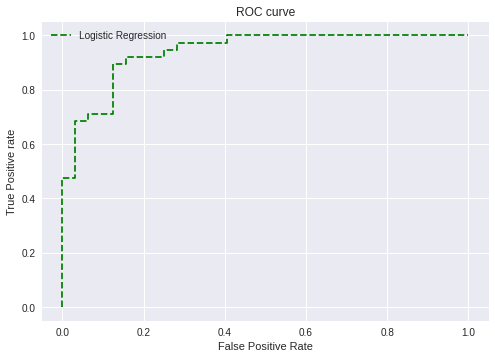

In [48]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.plot(fpr, tpr, linestyle='--',color='green', label='Logistic Regression')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=75a8ada9d511cd9bff34f7be79cfaf7089b82c326df99e30c46a686c7969b45c
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [ ]:
pip install sklearn.ensemble

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement sklearn.ensemble (from versions: none)
ERROR: No matching distribution found for sklearn.ensemble


# ***ADABOOST***

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
classifier_Adaboost=AdaBoostClassifier()

In [ ]:
params={ 'learning_rate': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], 
    
    "random_state": np.arange(0,100,1)}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(classifier_Adaboost,param_distributions=params,n_iter=5,scoring="roc_auc",n_jobs=-1,cv=5,verbose=3)

In [ ]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1.0, 10.0, 100.0,
                                                          1000.0],
                                        'random_state': array([ 0,  1,  2, ..., 97, 98, 99])},
                   scoring='roc_auc', verbose=3)

In [ ]:
random_search.best_estimator_

AdaBoostClassifier(learning_rate=0.1, random_state=27)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
classifier_Adaboost=AdaBoostClassifier(learning_rate=0.1, random_state=3)
classifier_Adaboost.fit(X_train,y_train)
y_pred=classifier_Adaboost.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(y_test,y_pred)
print(cfm)

print("Classification Report: ")
print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test,y_pred)
print("Accuracy of the model:",acc) 
print()

[[29  3]
 [ 4 34]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.91      0.89        32
           1       0.92      0.89      0.91        38

    accuracy                           0.90        70
   macro avg       0.90      0.90      0.90        70
weighted avg       0.90      0.90      0.90        70

Accuracy of the model: 0.9



### ***XGBOOST***

In [49]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 4,
    verbose=True
)

grid_search.fit(X_train, y_train)

grid_search.best_estimator_

m_best = grid_search.best_estimator_

y_t = m_best.predict(X_train)
train_acc = accuracy_score(y_train, y_t)

y_pred = m_best.predict(X_test)

test_acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred) 
print(accuracy_score(y_test,y_pred))


print ("Train accuracy: {0:.4f}".format(train_acc))
print ("Test accuracy: {0:.4f}".format(test_acc))
print ("Precision: {0:.4f}".format(precision))
print ("Recall: {0:.4f}".format(recall))
print ("F1: {0:.4f}".format(f1))


print('Training confusion matrix')
print(confusion_matrix(y_train, y_t))
print('Testing confusion matrix')
print(confusion_matrix(y_test, y_pred))

print ("Feature Importance")

importances = m_best.feature_importances_
for i in importances:
    print(i)

pred_prob2 = m_best.predict_proba(X_test) 

cfm=confusion_matrix(y_test,y_pred)
print(cfm)

print("Classification Report: ")
print(classification_report(y_test,y_pred))

Fitting 4 folds for each of 96 candidates, totalling 384 fits
0.8714285714285714
Train accuracy: 1.0000
Test accuracy: 0.8714
Precision: 0.8919
Recall: 0.8684
F1: 0.8800
Training confusion matrix
[[139   0]
 [  0 140]]
Testing confusion matrix
[[28  4]
 [ 5 33]]
Feature Importance
0.021138918
0.014858322
0.020786466
0.028005332
0.0081865415
0.01258456
0.026910264
0.026881758
0.037384227
0.11024912
0.019784246
0.02070344
0.013392362
0.061379127
0.34049872
0.020855919
0.033099506
0.0137183415
0.029082134
0.0
0.058506586
0.023106877
0.023698796
0.011515846
0.023672557
[[28  4]
 [ 5 33]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        32
           1       0.89      0.87      0.88        38

    accuracy                           0.87        70
   macro avg       0.87      0.87      0.87        70
weighted avg       0.87      0.87      0.87        70



## ***GRADIENT BOOSTING MACHINE***

In [50]:
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn import metrics 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from matplotlib import pyplot


In [51]:
baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=42)

baseline.fit(X_train, y_train)

gbm_predict_train = baseline.predict(X_train)

#get accuracy
gbm_accuracy = metrics.accuracy_score(y_train, gbm_predict_train)

#print accuracy
print ("GBM training Accuracy: {0:.4f}".format(gbm_accuracy))

gbm_predict_test = baseline.predict(X_test)

#get accuracy
gbm_accuracy_testdata = metrics.accuracy_score(y_test, gbm_predict_test)

#print accuracy
print ("GBM testing Accuracy: {0:.4f}".format(gbm_accuracy_testdata)) 
print(precision_score(y_test,y_pred)) 
print(f1_score(y_test, y_pred)) 
print(recall_score(y_test,y_pred))

from sklearn.metrics import log_loss
logloss = log_loss(y_test, gbm_predict_test)
print ("GBM Log Loss: {0:.4f}".format(logloss))

from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, gbm_predict_test)
print ("GBM AUC: {0:.4f}".format(auc))



#print('Training confusion matrix')
#print(confusion_matrix(y_train, gbm_predict_train))
#print('Testing confusion matrix')
#print(confusion_matrix(y_test, gbm_predict_test))

#print ("Confusion Matrix for GBM")

# labels for set 1=True to upper left and 0 = False to lower right
#print ("{0}".format(metrics.confusion_matrix(y_test, gbm_predict_test, labels=[1, 0])))

#print ("")

print ("Classification Report\n")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, gbm_predict_test, labels=[1, 0])))


GBM training Accuracy: 1.0000
GBM testing Accuracy: 0.8571
0.8918918918918919
0.88
0.868421052631579
GBM Log Loss: 5.1491
GBM AUC: 0.8586
Classification Report

              precision    recall  f1-score   support

           1       0.89      0.84      0.86        38
           0       0.82      0.88      0.85        32

    accuracy                           0.86        70
   macro avg       0.86      0.86      0.86        70
weighted avg       0.86      0.86      0.86        70



## ***LIGHT GRADIENT BOOSTING***

In [52]:
import lightgbm as lgb
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import sys,random
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import sklearn.metrics as metrics


In [53]:
params = {
    'application': 'binary', 
    'boosting': 'gbdt', 
    'num_iterations': 100, 
    'learning_rate': 0.05,
    'num_leaves': 62,
    'device': 'cpu', 
    'max_depth': -1, 
    'max_bin': 510, 
    'lambda_l1': 5, 
    'lambda_l2': 10, 
    'metric' : 'binary_error',
    'subsample_for_bin': 200, 
    'subsample': 1,
    'colsample_bytree': 0.8,
    'min_split_gain': 0.5, 
    'min_child_weight': 1, 
    'min_child_samples': 5
}

mdl = lgb.LGBMClassifier(boosting_type= 'gbdt', 
          objective = 'binary', 
          n_jobs = 5, 
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'], 
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'], 
          min_split_gain = params['min_split_gain'], 
          min_child_weight = params['min_child_weight'], 
          min_child_samples = params['min_child_samples'])

mdl.get_params().keys()

dict_keys(['boosting_type', 'class_weight', 'colsample_bytree', 'importance_type', 'learning_rate', 'max_depth', 'min_child_samples', 'min_child_weight', 'min_split_gain', 'n_estimators', 'n_jobs', 'num_leaves', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'silent', 'subsample', 'subsample_for_bin', 'subsample_freq', 'max_bin'])

In [ ]:
gridParams = {
    'learning_rate': [0.005, 0.01],
    'n_estimators': [8,16,24],
    'num_leaves': [6,8,12,16],
    'boosting_type' : ['gbdt', 'dart'], 
    'objective' : ['binary'],
    'max_bin':[255, 510], 
    'random_state' : [500],
    'colsample_bytree' : [0.64, 0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }

grid = GridSearchCV(mdl, gridParams, verbose=1, cv=5, n_jobs=-1)
# Run the grid
grid.fit(X_train, y_train)

Fitting 5 folds for each of 3456 candidates, totalling 17280 fits


In [ ]:
d_train = lgb.Dataset(X_train, label=y_train)
d_test = lgb.Dataset(X_test, label=y_test) 

watchlist = [d_train, d_test]

model = lgb.train(params, train_set=d_train, num_boost_round=1000, valid_sets=watchlist, early_stopping_rounds=50, verbose_eval=4)

y_t = model.predict(X_train)
y_t = np.where(y_t > 0.5, 1, 0)

train_acc = metrics.accuracy_score(y_train, y_t)

y_pred = model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)

test_acc = metrics.accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print ("Train accuracy: {0:.4f}".format(train_acc))
print ("Test accuracy: {0:.4f}".format(test_acc))
print ("Precision: {0:.4f}".format(precision))
print ("Recall: {0:.4f}".format(recall))
print ("F1: {0:.4f}".format(f1))
print ("AUC: {0:.4f}".format(auc))
print ("Log Loss: {0:.4f}".format(logloss)) 
print (metrics.classification_report(y_test, y_pred))


Training until validation scores don't improve for 50 rounds.
[4]	training's binary_error: 0.0967742	valid_1's binary_error: 0.114286
[8]	training's binary_error: 0.0896057	valid_1's binary_error: 0.114286
[12]	training's binary_error: 0.0896057	valid_1's binary_error: 0.114286
[16]	training's binary_error: 0.0896057	valid_1's binary_error: 0.114286
[20]	training's binary_error: 0.078853	valid_1's binary_error: 0.114286
[24]	training's binary_error: 0.078853	valid_1's binary_error: 0.1
[28]	training's binary_error: 0.078853	valid_1's binary_error: 0.1
[32]	training's binary_error: 0.0752688	valid_1's binary_error: 0.128571
[36]	training's binary_error: 0.0752688	valid_1's binary_error: 0.128571
[40]	training's binary_error: 0.0752688	valid_1's binary_error: 0.128571
[44]	training's binary_error: 0.0716846	valid_1's binary_error: 0.114286
[48]	training's binary_error: 0.0716846	valid_1's binary_error: 0.114286
[52]	training's binary_error: 0.0716846	valid_1's binary_error: 0.114286
[56]

/usr/local/lib/python3.8/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


# ***Voting Classifier***

####Hard Voting

In [ ]:
estimator = []
estimator.append(('LR', LogisticRegression(random_state=1)))
estimator.append(('GBC', GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=42)))
estimator.append(('XGB', XGBClassifier()))
estimator.append(('LGBM', lgb.LGBMClassifier())) 
#estimator.append(('ADB', AdaBoostClassifier()))
estimator.append(('RF', RandomForestClassifier(n_estimators = 1000, random_state = 42)))

In [ ]:
from sklearn.ensemble import VotingClassifier
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(X_train, y_train)
y_pred = vot_hard.predict(X_test)

In [ ]:
print(metrics.accuracy_score(y_test,y_pred)) 
print(metrics.precision_score(y_test,y_pred)) 
print(metrics.f1_score(y_test, y_pred)) 
print(metrics.recall_score(y_test,y_pred))

0.9
0.8974358974358975
0.9090909090909091
0.9210526315789473


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        32
           1       0.90      0.92      0.91        38

    accuracy                           0.90        70
   macro avg       0.90      0.90      0.90        70
weighted avg       0.90      0.90      0.90        70



<AxesSubplot:>

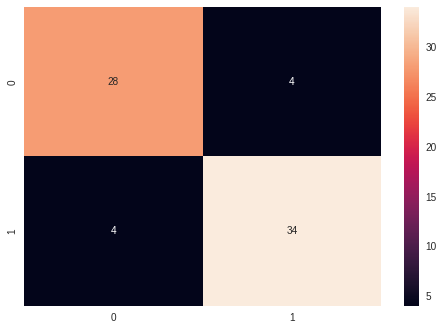

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [ ]:
pip install vecstack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19879 sha256=8a033f2dccf9ec78f06c9495f6731f7e55f1921a58d354385c0a26658cfeef29
  Stored in directory: /root/.cache/pip/wheels/17/89/0b/21d5484cbf713c95b641ec1bdc40dd7ae798cbdea2337e3535
Successfully built vecstack
